# WordCloud

```python
pip install wordcloud
```

_**Documentación:** https://github.com/amueller/word_cloud_

**`WordCloud`** es una libreria desarrollada por **Andreas Mueller** y nos permite generar nubes de palabras (**wordclouds**) utilizando solamente una cadena de caracteres. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from wordcloud import WordCloud, STOPWORDS

from PIL import Image

#### Cargamos un archivo de texto:

In [3]:
with open("alicia.txt", "r", encoding = "UTF-8") as file:
    alice_novel = file.read()

In [4]:
len(alice_novel)

170707

In [5]:
alice_novel

### stopwords
Palabras vacías (**stopwords en inglés**) es el nombre que reciben las palabras sin significado como artículos, pronombres, preposiciones, etc. que son filtradas antes o después del procesamiento de datos en **`NLP`**.

In [6]:
stopwords = STOPWORDS

stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

**Para crear un objeto WordCloud utilizamos la función `WordCloud()` que toma como parámetros el número total de palabras y los `stopswords`**.

**Para generar la nube debemos llenarla con las palabras del texto usando el método `.generate()`.**

In [7]:
alice_wc = WordCloud(background_color = "white",
                     max_words = len(alice_novel),
                     stopwords = stopwords)

# El objeto de WordCloud

alice_wc.generate(alice_novel)

**Para mostrar la imagen usamos la libreria de `matplotlib`**

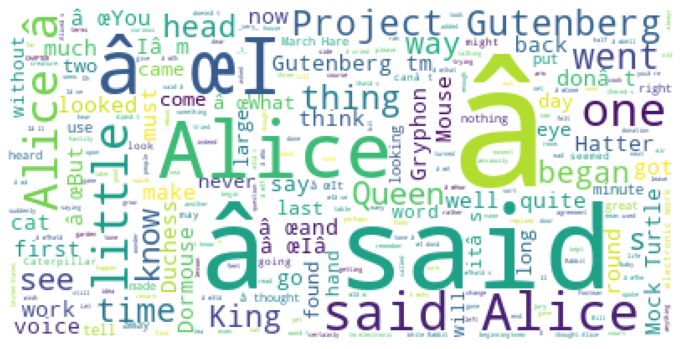

In [8]:
plt.subplots(figsize = (12, 12))
plt.imshow(alice_wc)
plt.axis("off")
plt.show()

**Para eliminar esos caracteres que no son palabras podemos agregalos a la lista de `stopwords`.**

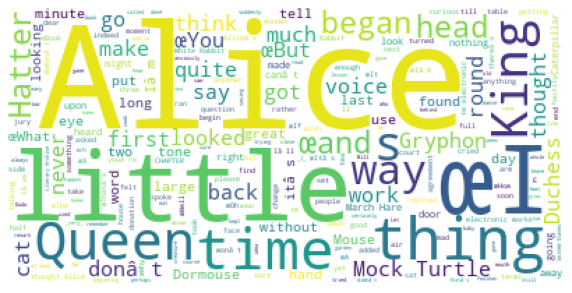

In [9]:
stopwords.add("said")
stopwords.add("one") 
stopwords.add("know") 
stopwords.add("will") 
stopwords.add("must") 
stopwords.add("went") 
stopwords.add("us") 
stopwords.add("come") 
stopwords.add("see") 
stopwords.add("well") 
stopwords.add("now") 
stopwords.add("may") 
stopwords.add("came") 
stopwords.add("seemed") 
stopwords.add("even") 
stopwords.add("project")
stopwords.add("Gutenberg")
stopwords.add("and")
stopwords.add("â")
stopwords.add("œ")
stopwords.add("Œ")

# Creamos de nuevo el objeto

alice_wc = WordCloud(background_color = "white",
                     max_words = len(alice_novel),
                     stopwords = stopwords)

alice_wc.generate(alice_novel)

plt.subplots(figsize = (10, 10))
plt.imshow(alice_wc)
plt.axis("off")
plt.show()

**También podemos usar una `mascara` para que el wordcloud tome la forma de una figura en lugar de un rectangulo.**

**Para esto necesitamos un archivo con extensión `.png`.**

In [10]:
mask = np.array(Image.open("alice_mask.png"))   
mask.shape

(523, 481, 3)

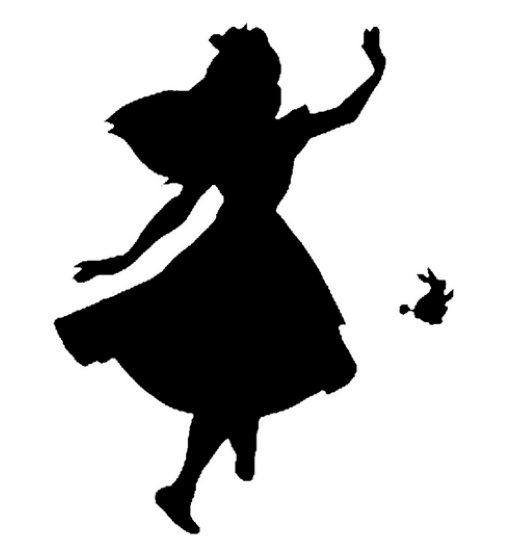

In [11]:
plt.subplots(figsize = (10, 10))

plt.imshow(mask, cmap = "binary_r")
plt.axis("off")
plt.show()

**Para unir el `wordcloud` con la mascara agregamos el parámetro `mask`.**

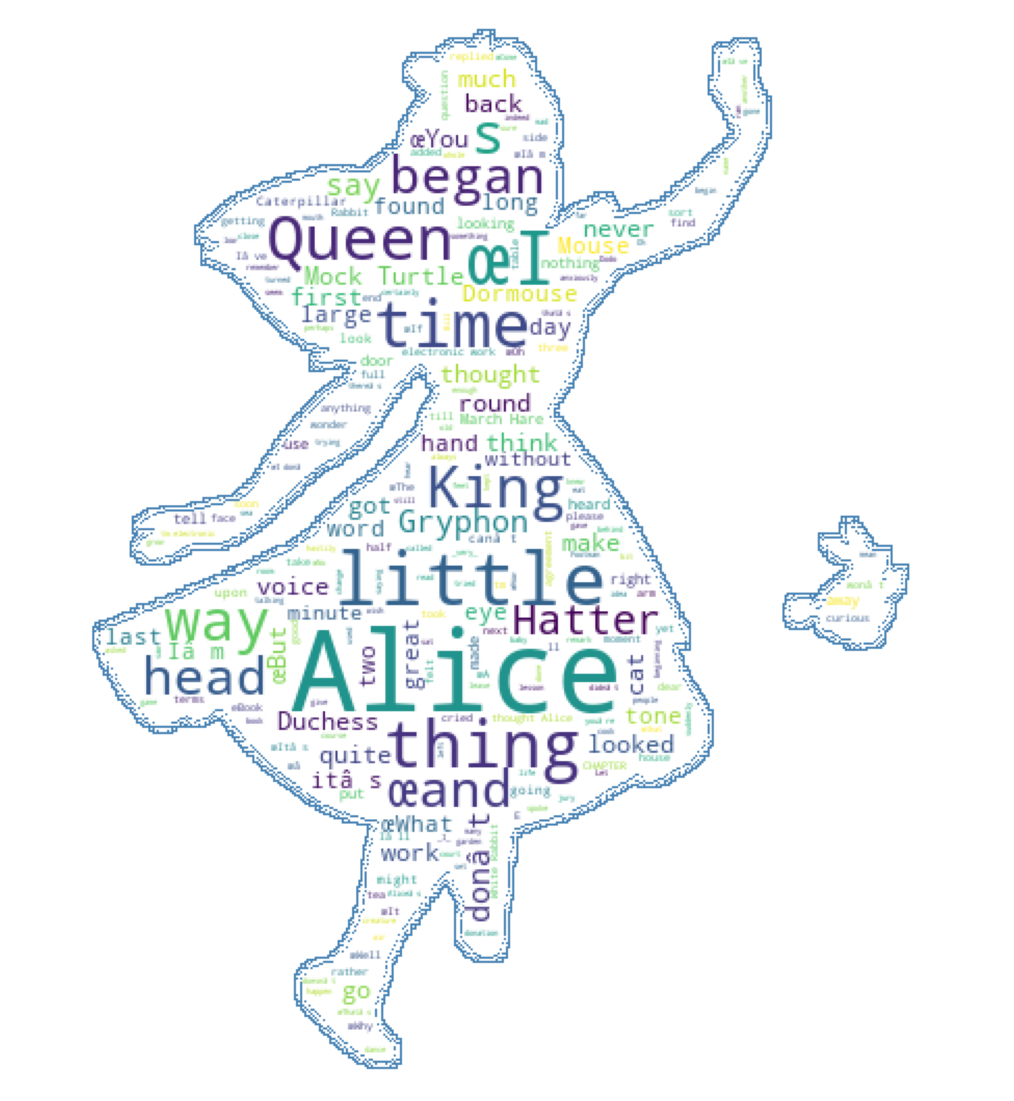

In [12]:
# Creamos de nuevo el objeto agregando la mascara

alice_wc = WordCloud(background_color = "white",
                     max_words = 2000,
                     mask = mask,
                     stopwords = stopwords,
                     contour_width = 0.5,
                     contour_color = "steelblue")

alice_wc.generate(alice_novel)


fig, ax = plt.subplots(figsize = (20, 20))
ax.imshow(alice_wc)
ax.axis("off")
alice_wc.to_file("imagenalicia.png")
plt.show()

**Otro `wordcloud`:**

In [13]:
with open("breakingbadscript.txt", "r", encoding = "UTF-8") as file:
    breakingbad_script = file.read()

In [14]:
bb_wc = WordCloud(background_color = "white",
                  max_words = len(breakingbad_script),
                  stopwords = stopwords)

# El objeto de word cloud
bb_wc.generate(breakingbad_script)

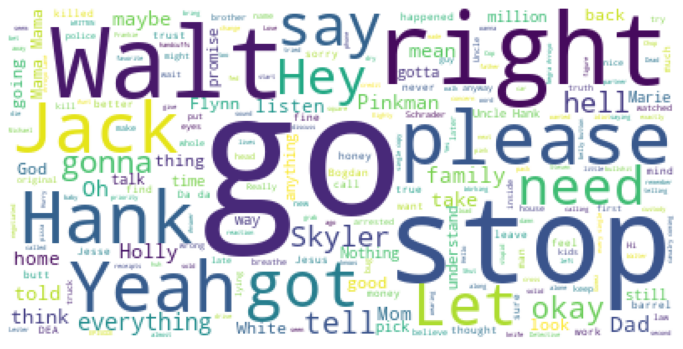

In [15]:
plt.subplots(figsize = (12, 12))
plt.imshow(bb_wc)
plt.axis("off")
plt.show()

In [16]:
breakingbad_mask = np.array(Image.open("breakingbad_mask.png"))
breakingbad_mask.shape

(3371, 3054, 4)

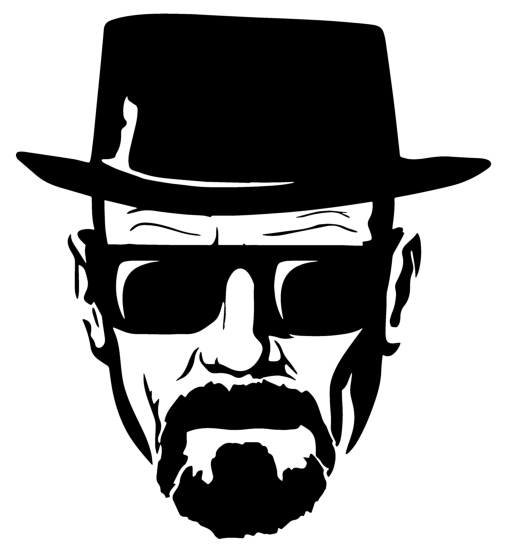

In [17]:
plt.subplots(figsize = (10, 10))

plt.imshow(breakingbad_mask)
plt.axis("off")
plt.show()

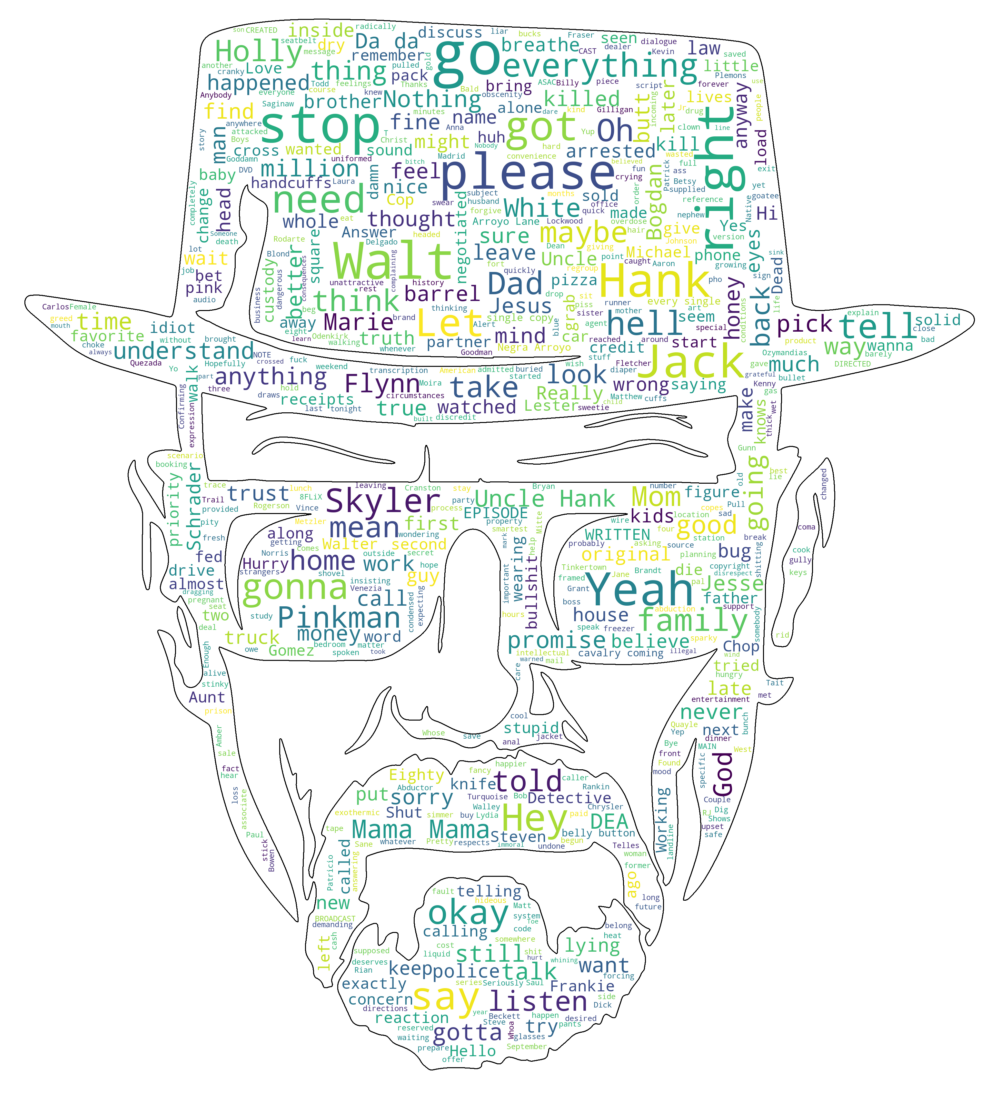

Wall time: 2min 35s


In [18]:
%%time

# Creamos de nuevo el objeto agregando la mascara
bb_wc = WordCloud(background_color = "white",
                  max_words = 2000,
                  mask = breakingbad_mask,
                  stopwords = stopwords,
                  contour_width = 2,
                  contour_color = "black")

bb_wc.generate(breakingbad_script)

plt.subplots(figsize = (20, 20))

plt.imshow(bb_wc, interpolation = "bilinear")
plt.axis("off")
bb_wc.to_file("imagenbb.png")
plt.show()

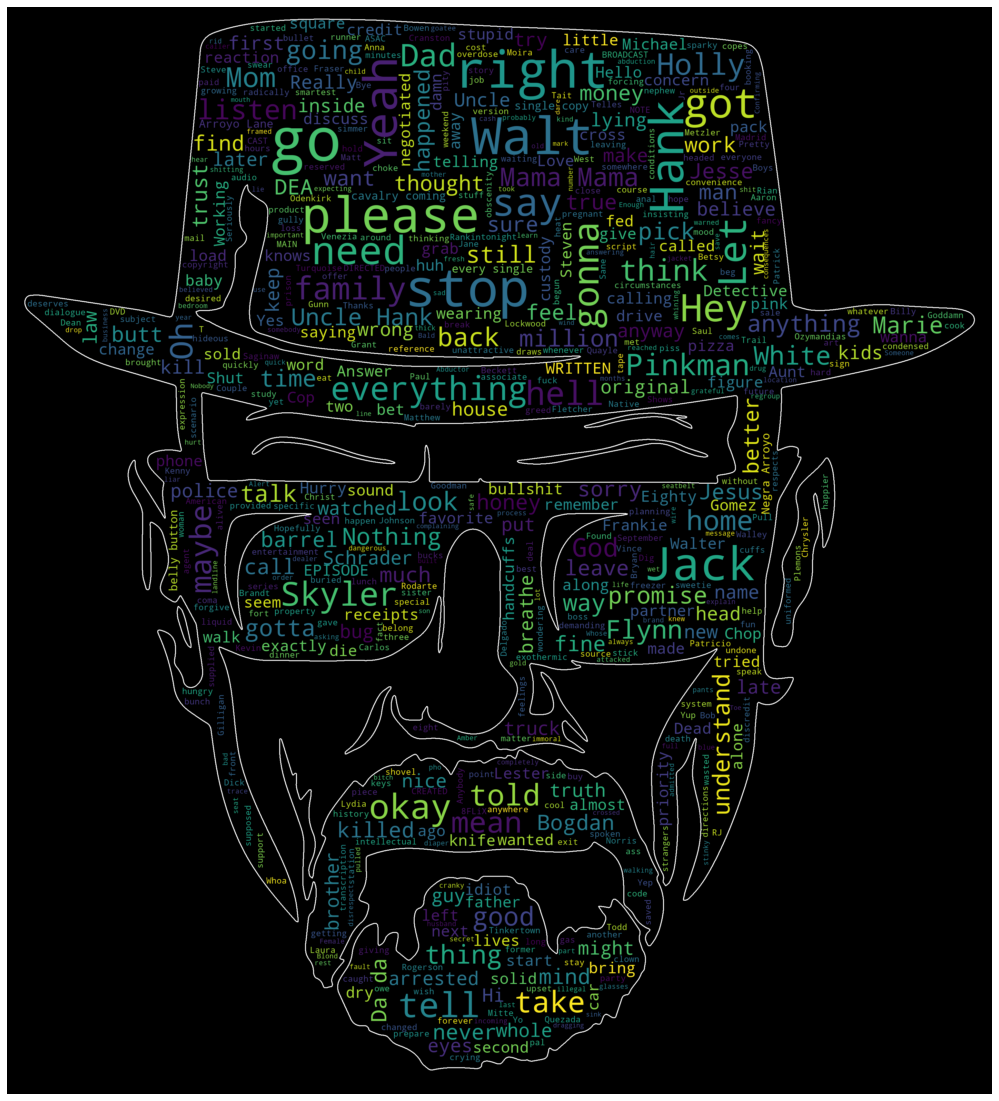

Wall time: 2min 35s


In [19]:
%%time

bb_wc = WordCloud(background_color = "black",
                  max_words = 2000,
                  mask = breakingbad_mask,
                  stopwords = stopwords,
                  contour_width = 2,
                  contour_color = "white")

bb_wc.generate(breakingbad_script)

plt.subplots(figsize = (20, 20))

plt.imshow(bb_wc, interpolation = "bilinear")
plt.axis("off")
bb_wc.to_file("imagenbb.png")
plt.show()

In [ ]:
################################################################################################################################

### Ejercicio:
- Genera un **`wordcloud`** de algo que te interese. Saca la información de un archivo de internet, puedes usar el **`api de twitter`** para extraer la información, hacer **`web scraping`** sobre alguna página o simplemente descargar un **`.txt`**. Encuentra un archivo **`.png`** para hacer una mascara sobre el **`wordcloud`**, personaliza la gráfica como quieras.

In [43]:
with open("Campeones_MotoGP.txt", "r", encoding = "UTF-8") as file:
    campeones = file.read()

In [44]:
campeones_wc = WordCloud(background_color = "white",
                  max_words = len(campeones),
                  stopwords = stopwords)

campeones_wc.generate(campeones)

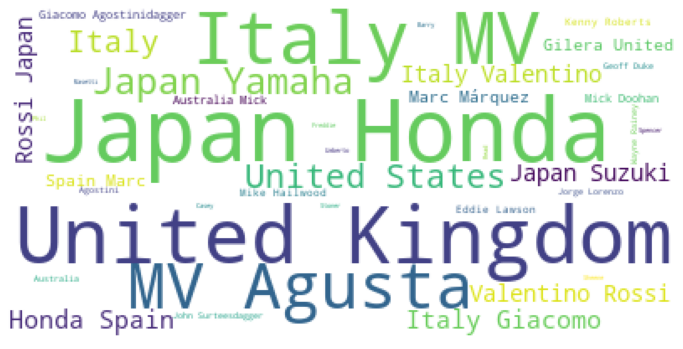

In [45]:
plt.subplots(figsize = (12, 12))
plt.imshow(campeones_wc)
plt.axis("off")
plt.show()

In [49]:
campeones_mask = np.array(Image.open("Moto.png"))
campeones_mask.shape

(1200, 1200, 3)

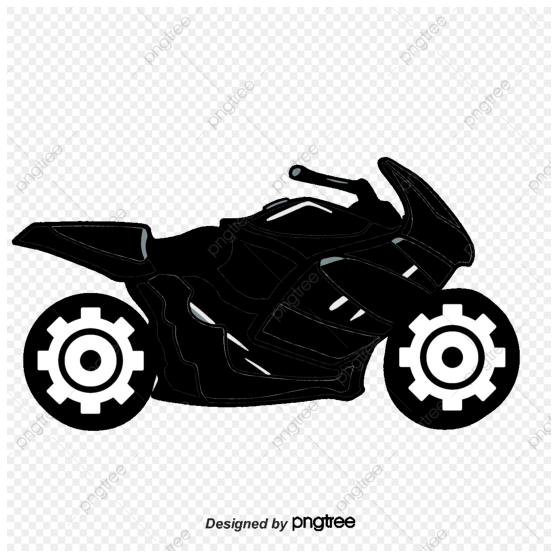

In [50]:
plt.subplots(figsize = (10, 10))

plt.imshow(campeones_mask)
plt.axis("off")
plt.show()

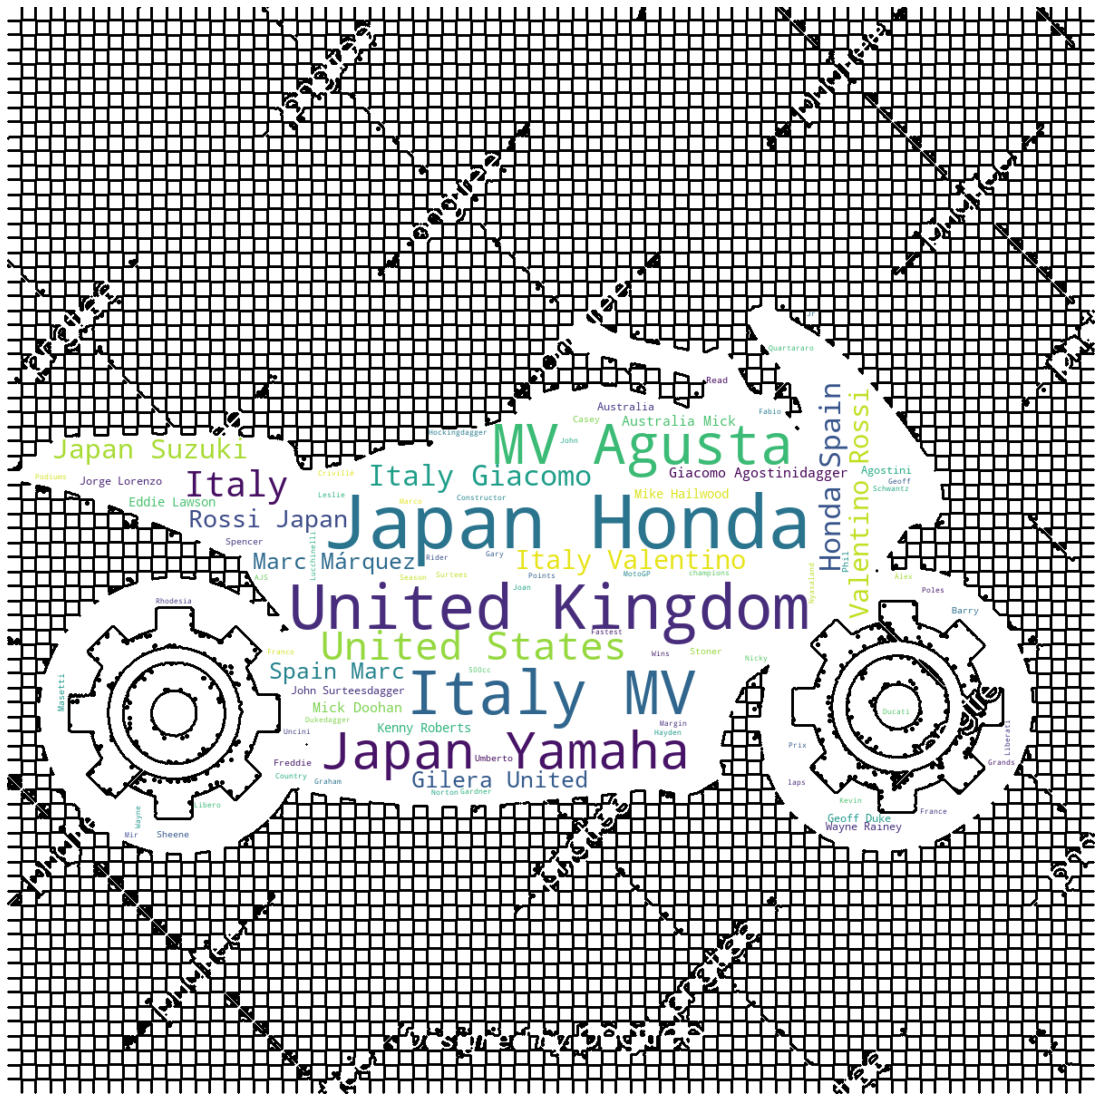

Wall time: 3.84 s


In [51]:
%%time

campeones_wc = WordCloud(background_color = "white",
                  max_words = 2000,
                  mask = campeones_mask,
                  stopwords = stopwords,
                  contour_width = 2,
                  contour_color = "black")

campeones_wc.generate(campeones)

plt.subplots(figsize = (20, 20))

plt.imshow(campeones_wc, interpolation = "bilinear")
plt.axis("off")
campeones_wc.to_file("Ucraniawc.png")
plt.show()